# Data Exploration & Preprocessing

Mục tiêu:
- Đọc dữ liệu World Bank đã tổng hợp (2000–2024)
- Khám phá, làm sạch, và chuẩn hóa dữ liệu
- Chia dữ liệu thành train/test để phục vụ các mô hình Machine Learning

Nguồn dữ liệu: `data/worldbank_2000_2024.csv`


## Import các thư viện cần thiết

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Bước 1 - Đọc dữ liệu

Đọc dữ liệu từ file CSV và loại bỏ các bản ghi trùng lặp để đảm bảo chất lượng dữ liệu.


In [37]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("../data/worldbank_2000_2024.csv")

In [38]:
print("=== Dữ liệu gốc (5 dòng đầu) ===")
df.head()  

=== Dữ liệu gốc (5 dòng đầu) ===


,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
0,Aruba,ABW,2000,90588.0,NaN,1.030817,72.939,20681.023027,7.622921,NaN,91.7,94.488806,2.965073,0.0,NaN
1,Aruba,ABW,2001,91439.0,NaN,0.935033,73.044,20740.132583,4.182002,NaN,100.0,94.770491,2.969193,NaN,NaN
2,Aruba,ABW,2002,92074.0,NaN,0.692052,73.135,21307.248251,-0.944953,NaN,100.0,95.052176,3.221322,0.0,NaN
3,Aruba,ABW,2003,93128.0,NaN,1.138229,73.236,21949.485996,1.110505,NaN,100.0,95.333861,3.671291,NaN,NaN
4,Aruba,ABW,2004,95138.0,NaN,2.135358,73.223,23700.631990,7.293728,NaN,100.0,95.615545,3.667304,0.0,NaN


In [39]:
print("Kích thước dữ liệu ban đầu:", df.shape)
rows_before = df.shape[0]
df = df.drop_duplicates()
rows_after = df.shape[0]
removed = rows_before - rows_after

print("Kích thước sau khi loại bỏ trùng lặp:", df.shape)
print(f"Đã loại bỏ {removed} dòng trùng lặp.")

Kích thước dữ liệu ban đầu: (5425, 15)
Kích thước sau khi loại bỏ trùng lặp: (5425, 15)
Đã loại bỏ 0 dòng trùng lặp.


## Bước 2 - Tổng quan dữ liệu

Phân tích cấu trúc dữ liệu, kiểu dữ liệu và ý nghĩa của từng thuộc tính. Rút ngắn tên các cột để dễ dàng trong việc phân tích và trực quan hóa.


In [40]:
# Rút ngắn tên các cột để dễ phân tích
df.columns = [
    'country_name', 'country_code', 'year', 'population', 'poverty_ratio',
    'pop_growth', 'life_expectancy', 'gdp_per_capita', 'gdp_growth',
    'sanitation', 'electricity', 'water_access', 'co2_emissions',
    'slum_population', 'labor_force'
]

print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:")
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số quốc gia: {df['country_name'].nunique()}")
print(f"Khoảng thời gian: {df['year'].min()}-{df['year'].max()}")

print("\nÝ NGHĨA CÁC THUỘC TÍNH:")
print("1. country_name: Tên quốc gia")
print("2. country_code: Mã quốc gia")
print("3. year: Năm")
print("4. population: Tổng dân số")
print("5. poverty_ratio: Tỷ lệ nghèo (% dân số)")
print("6. pop_growth: Tăng trưởng dân số hàng năm (%)")
print("7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET")
print("8. gdp_per_capita: GDP bình quân đầu người (USD)")
print("9. gdp_growth: Tăng trưởng GDP hàng năm (%)")
print("10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)")
print("11. electricity: Tỷ lệ tiếp cận điện (%)")
print("12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)")
print("13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)")
print("14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)")
print("15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)")

THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:
Kích thước dữ liệu: (5425, 15)
Số quốc gia: 217
Khoảng thời gian: 2000-2024

Ý NGHĨA CÁC THUỘC TÍNH:
1. country_name: Tên quốc gia
2. country_code: Mã quốc gia
3. year: Năm
4. population: Tổng dân số
5. poverty_ratio: Tỷ lệ nghèo (% dân số)
6. pop_growth: Tăng trưởng dân số hàng năm (%)
7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET
8. gdp_per_capita: GDP bình quân đầu người (USD)
9. gdp_growth: Tăng trưởng GDP hàng năm (%)
10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)
11. electricity: Tỷ lệ tiếp cận điện (%)
12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)
13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)
14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)
15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)


In [41]:
print("\nTHÔNG TIN DỮ LIỆU:")
df.info()


THÔNG TIN DỮ LIỆU:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     5425 non-null   object 
 1   country_code     5425 non-null   object 
 2   year             5425 non-null   int64  
 3   population       5425 non-null   float64
 4   poverty_ratio    1834 non-null   float64
 5   pop_growth       5424 non-null   float64
 6   life_expectancy  5208 non-null   float64
 7   gdp_per_capita   5213 non-null   float64
 8   gdp_growth       5141 non-null   float64
 9   sanitation       3117 non-null   float64
 10  electricity      5135 non-null   float64
 11  water_access     4777 non-null   float64
 12  co2_emissions    4872 non-null   float64
 13  slum_population  2015 non-null   float64
 14  labor_force      4666 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 635.9+ KB


## Bước 3 - Xử lý giá trị thiếu
Mục tiêu:
- Phân tích giá trị thiếu của từng biến
- Dự đoán và điền giá trị thiếu cho các biến có tỷ lệ NaN cao
- Điền giá trị còn lại bằng mean/median phù hợp

### 3.1. Phân tích giá trị thiếu
- In ra tỷ lệ thiếu của từng cột (%)
- Hiển thị ma trận tương quan để xem mối quan hệ giữa các biến

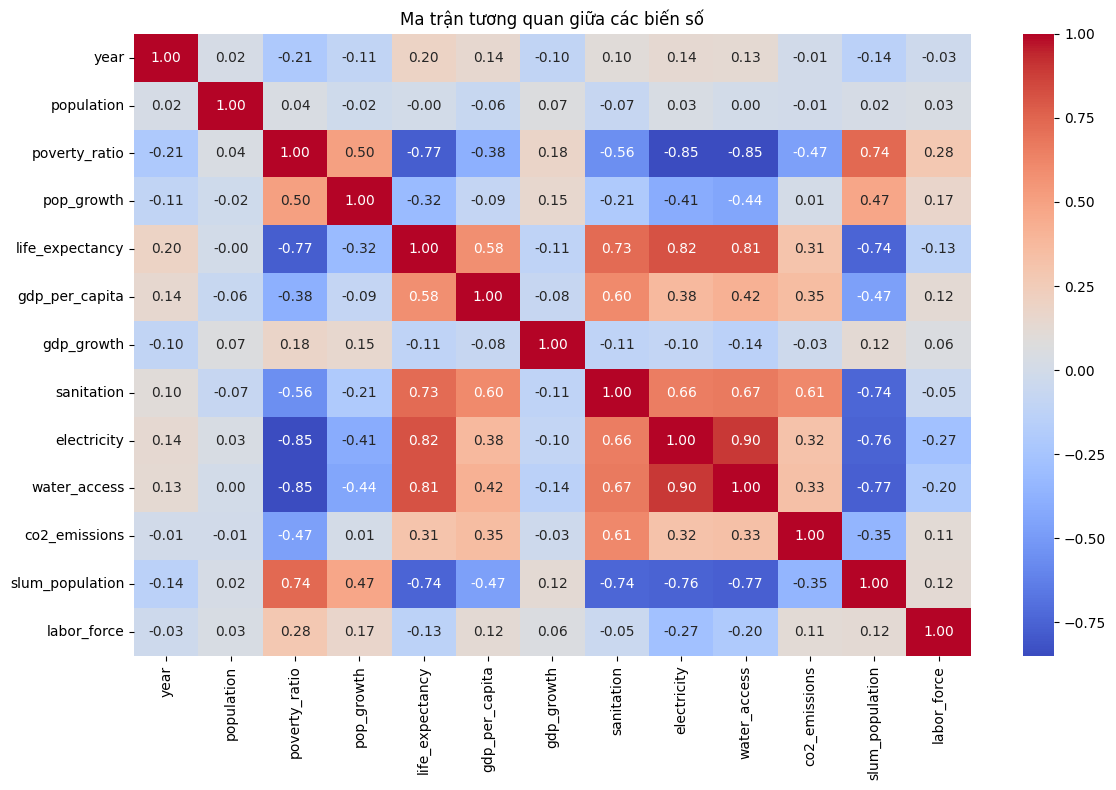

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tính tỷ lệ thiếu (%)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

missing_percent[missing_percent > 0]

# %%
# Hiển thị heatmap tương quan để phục vụ việc lựa chọn biến dự đoán
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.tight_layout()
plt.show()

### 3.2. Dự đoán và điền giá trị cho các cột có tỷ lệ thiếu cao
Các biến này có tương quan mạnh (|r| > 0.5) với các đặc trưng kinh tế - xã hội khác nên có thể dự đoán hợp lý bằng mô hình **Random Forest Regressor**:
| Biến cần dự đoán | Biến dùng để dự đoán | Lý do chọn |
|------------------|----------------------|-------------|
| `sanitation` | `gdp_per_capita`, `electricity`, `water_access` | tương quan mạnh (>0.5) |
| `poverty_ratio` | `pop_growth`, `electricity`, `water_access` | liên hệ trực tiếp với mức phát triển cơ bản |
| `slum_population` | `electricity`, `water_access` | phản ánh điều kiện sống cơ bản |

Sau khi dự đoán xong, các giá trị NaN trong ba cột này sẽ được thay thế bằng giá trị dự đoán.

In [43]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_by_rf(df, target, predictors):
    df_known = df[df[target].notnull()]
    df_missing = df[df[target].isnull()]

    if len(df_missing) == 0:
        print(f"{target}: Không có giá trị thiếu.")
        return df

    model = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
    model.fit(df_known[predictors], df_known[target])
    df.loc[df[target].isnull(), target] = model.predict(df_missing[predictors])

    print(f"✅ Đã dự đoán và điền giá trị thiếu cho '{target}' ({len(df_missing)} dòng).")
    return df


# sanitation
df = fill_missing_by_rf(df, 'sanitation', ['gdp_per_capita', 'electricity', 'water_access'])

# poverty_ratio
df = fill_missing_by_rf(df, 'poverty_ratio', ['pop_growth', 'electricity', 'water_access'])

# slum_population
df = fill_missing_by_rf(df, 'slum_population', ['electricity', 'water_access'])

✅ Đã dự đoán và điền giá trị thiếu cho 'sanitation' (2308 dòng).
✅ Đã dự đoán và điền giá trị thiếu cho 'poverty_ratio' (3591 dòng).
✅ Đã dự đoán và điền giá trị thiếu cho 'slum_population' (3410 dòng).


### 3.3. Điền giá trị cho các cột còn thiếu (theo Skewness)

In [44]:
# Chọn các cột dạng số
numeric_cols = df.select_dtypes(include=[np.number]).columns

#  Tính tỷ lệ outlier theo IQR (chỉ in những cột có > 0%)
print("📊 TỶ LỆ OUTLIER CHO TỪNG CỘT (chỉ hiển thị > 0%)\n")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_ratio = outlier_count / df[col].notna().sum() * 100

    if outlier_ratio > 0:
        print(f"- {col:<20}: {outlier_count:>6} outliers ({outlier_ratio:6.2f}%)")

#  Tính Skewness cho từng cột
print("\n GIÁ TRỊ SKEWNESS VÀ PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU:\n")

for col in numeric_cols:
    skew_val = df[col].skew()
    if df[col].isna().sum() > 0:
        if -0.5 <= skew_val <= 0.5:
            method = "Mean"
            fill_value = df[col].mean()
        else:
            method = "Median"
            fill_value = df[col].median()

        df[col].fillna(fill_value, inplace=True)
        print(f"- {col:<20}: Skewness = {skew_val:>6.3f} → Điền bằng {method}")
    else:
        print(f"- {col:<20}: Skewness = {skew_val:>6.3f} → Không có giá trị thiếu")

📊 TỶ LỆ OUTLIER CHO TỪNG CỘT (chỉ hiển thị > 0%)

- population          :    623 outliers ( 11.48%)
- poverty_ratio       :    348 outliers (  6.41%)
- pop_growth          :    131 outliers (  2.42%)
- life_expectancy     :     54 outliers (  1.04%)
- gdp_per_capita      :    428 outliers (  8.21%)
- gdp_growth          :    344 outliers (  6.69%)
- electricity         :    454 outliers (  8.84%)
- water_access        :    335 outliers (  7.01%)
- co2_emissions       :    332 outliers (  6.81%)
- labor_force         :    134 outliers (  2.87%)

 GIÁ TRỊ SKEWNESS VÀ PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU:

- year                : Skewness =  0.000 → Không có giá trị thiếu
- population          : Skewness =  8.898 → Không có giá trị thiếu
- poverty_ratio       : Skewness =  1.456 → Không có giá trị thiếu
- pop_growth          : Skewness =  0.968 → Điền bằng Median
- life_expectancy     : Skewness = -0.828 → Điền bằng Median
- gdp_per_capita      : Skewness =  3.181 → Điền bằng Median
- gdp_growt

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7364\1323078022.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7364\1323078022.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [45]:
# Kiểm tra lại dữ liệu sau khi điền
nan_counts = df.isna().sum().sum()
print(f"\n✅ Tổng số giá trị NaN còn lại sau khi xử lý: {nan_counts}")

# Xem dữ liệu đầu tiên sau khi điền giá trị
df.head()


✅ Tổng số giá trị NaN còn lại sau khi xử lý: 0


,country_name,country_code,year,population,poverty_ratio,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,slum_population,labor_force
0,Aruba,ABW,2000,90588.0,6.7980,1.030817,72.939,20681.023027,7.622921,30.949145,91.7,94.488806,2.965073,0.000000,60.895221
1,Aruba,ABW,2001,91439.0,1.9710,0.935033,73.044,20740.132583,4.182002,55.384827,100.0,94.770491,2.969193,6.662656,60.895221
2,Aruba,ABW,2002,92074.0,3.1740,0.692052,73.135,21307.248251,-0.944953,57.927596,100.0,95.052176,3.221322,0.000000,60.895221
3,Aruba,ABW,2003,93128.0,1.6095,1.138229,73.236,21949.485996,1.110505,56.465393,100.0,95.333861,3.671291,4.119222,60.895221
4,Aruba,ABW,2004,95138.0,4.8100,2.135358,73.223,23700.631990,7.293728,59.253413,100.0,95.615545,3.667304,0.000000,60.895221


## Bước 4 - Chuẩn hóa dữ liệu

### 🎯 Mục tiêu:
- Chuẩn hóa dữ liệu số để đảm bảo các biến có cùng thang đo, giúp mô hình học hiệu quả hơn.
- Sử dụng **StandardScaler (Z-score)** cho các biến số.
- **Không chuẩn hóa** các biến phân loại như `country_name`, `country_code` vì chúng mang ý nghĩa phân loại, hữu ích cho mô hình.
- **Không chuẩn hóa** các cột `year` và `life_expectancy` vì:
  - `year` là chỉ số thời gian, mang ý nghĩa tuần tự, không cần chuẩn hóa.
  - `life_expectancy` là **biến mục tiêu (target)**, việc chuẩn hóa hay không sẽ tùy thuộc vào thuật toán dự đoán sau này.

---

### 📐 Phương pháp chuẩn hóa: Z-score

\[
Z = \frac{X - \mu}{\sigma}
\]

Trong đó:
- \( \mu \): giá trị trung bình của biến  
- \( \sigma \): độ lệch chuẩn của biến  
Sau chuẩn hóa, mỗi biến sẽ có **trung bình = 0** và **độ lệch chuẩn = 1**.

In [46]:
# %% 
from sklearn.preprocessing import StandardScaler
import os

# Chọn các cột dạng số cần chuẩn hóa (trừ year và life_expectancy)
num_cols_to_scale = [
    c for c in numeric_cols 
    if c not in ['life_expectancy', 'year']
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols_to_scale] = scaler.fit_transform(df_scaled[num_cols_to_scale])

# Tạo thư mục processed nếu chưa có
os.makedirs("../data/processed", exist_ok=True)

# Lưu dữ liệu đã chuẩn hóa
df_scaled.to_csv("../data/processed/processed_data.csv", index=False)

# Hiển thị dữ liệu sau chuẩn hóa
print("✅ DỮ LIỆU SAU KHI CHUẨN HÓA:\n")
df_scaled.head()

✅ DỮ LIỆU SAU KHI CHUẨN HÓA:



,country_name,country_code,year,population,poverty_ratio,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,slum_population,labor_force
0,Aruba,ABW,2000,-0.251571,-0.420171,-0.159707,72.939,0.201934,0.731507,-0.762051,0.326470,0.418265,-0.195494,-0.964939,7.014949e-16
1,Aruba,ABW,2001,-0.251564,-0.651673,-0.219204,73.044,0.204343,0.140035,0.105561,0.619765,0.434811,-0.195006,-0.731991,7.014949e-16
2,Aruba,ABW,2002,-0.251560,-0.593978,-0.370132,73.135,0.227464,-0.741258,0.195845,0.619765,0.451356,-0.165147,-0.964939,7.014949e-16
3,Aruba,ABW,2003,-0.251552,-0.669011,-0.092988,73.236,0.253647,-0.387937,0.143928,0.619765,0.467902,-0.111857,-0.820918,7.014949e-16
4,Aruba,ABW,2004,-0.251536,-0.515515,0.526381,73.223,0.325040,0.674921,0.242919,0.619765,0.484448,-0.112329,-0.964939,7.014949e-16


## Bước 5 - Chia dữ liệu Train/Test

### 🎯 Mục tiêu:
- Chuẩn bị dữ liệu cho bước huấn luyện mô hình dự đoán `life_expectancy`.
- Chia dữ liệu thành **tập huấn luyện (train)** và **tập kiểm tra (test)**.
- Giữ nguyên tỉ lệ: **90% train / 10% test**.
- Lưu 4 file riêng biệt vào thư mục `../data/processed/` để tiện sử dụng sau này.

In [47]:
# %%
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Đọc dữ liệu đã chuẩn hóa từ bước 4
df_processed = pd.read_csv("../data/processed/processed_data.csv")

# Xác định biến target và feature
target = 'life_expectancy'
features = [c for c in df_processed.columns if c != target]

X = df_processed[features]
y = df_processed[target]

# Chia dữ liệu 90% train / 10% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=True
)

# Tạo thư mục nếu chưa có
os.makedirs("../data/processed", exist_ok=True)

# Lưu các tập dữ liệu
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

# Hiển thị kích thước các tập để kiểm tra
print("✅ Kích thước tập dữ liệu:")
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

✅ Kích thước tập dữ liệu:
X_train: (4882, 14)
X_test : (543, 14)
y_train: (4882,)
y_test : (543,)


## ✅ Kết luận tổng quá trình xử lý dữ liệu

Sau khi hoàn thành **5 bước tiền xử lý dữ liệu**, bộ dữ liệu hiện đã sạch, không còn giá trị thiếu, không có trùng lặp và sẵn sàng cho huấn luyện mô hình dự đoán **tuổi thọ trung bình (life_expectancy)**.

---

### 🔹 Bước 1 – Đọc dữ liệu
- Đọc dữ liệu từ file `worldbank_2000_2024.csv`.  
- Kiểm tra sơ bộ số dòng, số cột, kiểu dữ liệu và số lượng giá trị thiếu.  

---

### 🔹 Bước 2 – Tổng quan dữ liệu
- Hiển thị thống kê mô tả (`describe()`) và danh sách các cột.  
- Rút gọn các tên cột quá dài (ví dụ:  
  `Life expectancy at birth, total (years)` → `life_expectancy`).  
- Xác định các biến dạng số và dạng phân loại để phục vụ xử lý sau.

---

### 🔹 Bước 3 – Làm sạch dữ liệu
**3.1. Xử lý trùng lặp**  
- Dùng `drop_duplicates()` để loại bỏ bản ghi trùng.  

**3.2. Loại bỏ cột có tỷ lệ thiếu quá cao**  
- Loại các cột có hơn 40% giá trị thiếu như: `poverty_ratio`, `slum_population`, `sanitation`.  

**3.3. Điền giá trị thiếu (Dựa trên Skewness)**  
- Với từng cột dạng số:
  - Tính tỷ lệ outlier bằng **IQR**, chỉ in ra những cột có tỷ lệ > 0%.  
  - Tính **Skewness** cho từng cột.  
  - Nếu `|skew| ≤ 0.5` → điền **Mean**.  
  - Nếu `|skew| > 0.5` → điền **Median**.  
- Sau khi điền, kiểm tra lại bằng `df.isna().sum()` đảm bảo không còn giá trị thiếu.  

---

### 🔹 Bước 4 – Chuẩn hóa dữ liệu
- Áp dụng **StandardScaler (Z-score)** cho các cột dạng số.  
- **Không chuẩn hóa**:
  - Cột `life_expectancy` (target).  
  - Cột `year` (biến thời gian, mang ý nghĩa gốc).  
- Lưu dữ liệu chuẩn hóa vào `../data/processed/processed_data.csv`.  

---

### 🔹 Bước 5 – Chia dữ liệu Train/Test
- Đọc lại dữ liệu đã chuẩn hóa.  
- Tách biến target (`life_expectancy`) và features.  
- Chia dữ liệu **90% train / 10% test** bằng `train_test_split`.  
- Lưu 4 file:
  - `X_train.csv`, `X_test.csv`, `y_train.csv`, `y_test.csv`  
  trong thư mục `../data/processed/`.  

---

### 📊 Kết quả cuối cùng:
| Tập dữ liệu | Kích thước | Ghi chú |
|--------------|------------|---------|
| **X_train** | 90% mẫu | Dữ liệu huấn luyện (features) |
| **X_test** | 10% mẫu | Dữ liệu kiểm thử (features) |
| **y_train** | 90% mẫu | Target cho huấn luyện |
| **y_test** | 10% mẫu | Target cho kiểm thử |

---

### ✅ Tổng kết:
- Dữ liệu đã được **làm sạch hoàn toàn**: không trùng lặp, không thiếu.  
- Các cột dạng số đã được **chuẩn hóa Z-score** (trừ `life_expectancy`, `year`).  
- Dữ liệu đã được **chia train/test hợp lý** để sẵn sàng cho mô hình dự đoán.  
- Toàn bộ quá trình được thực hiện qua **5 bước rõ ràng, tuần tự, logic**.